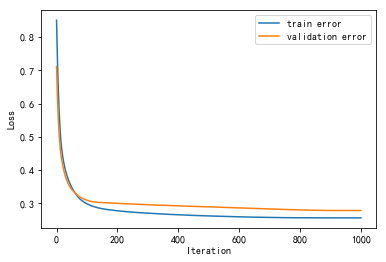

In [4]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
"""
-------------------------------------------------
   File Name：     LinearClassification
   Description :
   Author :       Nathan
   date：          2017/12/2
-------------------------------------------------
   Change Activity:
                   2017/12/2:
-------------------------------------------------
"""
__author__ = 'Nathan'

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

parm={"C":0.9}

def compute_error(W,X_test,y_test):
    L=0
    N=y_test.shape[0]
    for i in range(N):
        L+=max(0,1-y_test[i]*np.dot(W.transpose(),X_test[i]))
    return (0.5*np.dot(W.T,W)+L*parm.get("C"))/N


def compute_gradient(W,X_train, y_train):
    L_dW=np.repeat(0.,X_train.shape[1])
    for i in range(y_train.shape[0]):
        if y_train[i]*(np.dot(W.transpose(),X_train[i]))<1:
            L_dW+=-y_train[i]*X_train[i]
        else:
            pass
    return L_dW+W

def SVM_train(X_train, y_train,W,learning_rate):
    W-=learning_rate*compute_gradient(W,X_train, y_train)
    return W

def shuffle(X,y):
    rng_state = np.random.get_state()
    np.random.shuffle(X)
    np.random.set_state(rng_state)
    np.random.shuffle(y)
    return X,y

def getdata():
    X, y = load_svmlight_file(r'C:\Users\jy\Desktop\Libsvmdata\australian_scale.txt')
    X = np.c_[np.ones(len(X.toarray())), X.toarray()]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    X_train, y_train = shuffle(X_train, y_train)
    X_test, y_test = shuffle(X_test, y_test)
    return X_train, X_test, y_train, y_test

def SVMModel():
    X_train, X_test, y_train, y_test=getdata()
    learning_rate = 0.00015
    iter_num = 1000
    train_error=[]
    test_error=[]
    W = np.random.rand(X_train.shape[1])
    for i in range(iter_num):
        W=SVM_train(X_train, y_train,W,learning_rate)
        train_error.append(compute_error(W,X_train,y_train))
        test_error.append(compute_error(W,X_test,y_test))

    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.plot(range(iter_num), train_error,label="train error")
    plt.plot(range(iter_num), test_error, label="validation error")
    plt.legend()
    plt.show()

SVMModel()
